In [48]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

df = pd.read_csv(path + '/Housing.csv')


{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.6080905833947525
887704.3986953786
1593738635876.8132


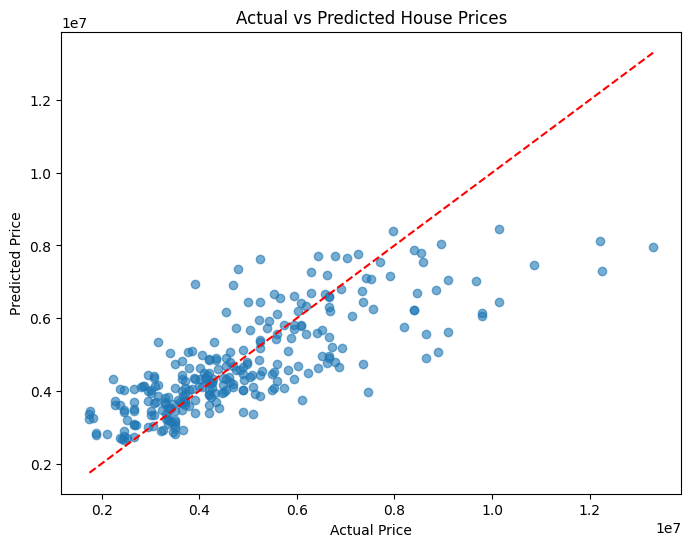

In [9]:
import pandas as pd
import kagglehub
import numpy as np

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
df = pd.read_csv(path + '/Housing.csv')

df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y= np.log1p(df_encoded["price"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train)
print(grid.best_params_)
best_model = grid.best_estimator_

best_model = grid.best_estimator_
best_model.fit(X_train, y_train) 

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test_original,y_pred))
print(mean_absolute_error(y_test_original,y_pred))
print(mean_squared_error(y_test_original,y_pred))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_original, y_pred, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

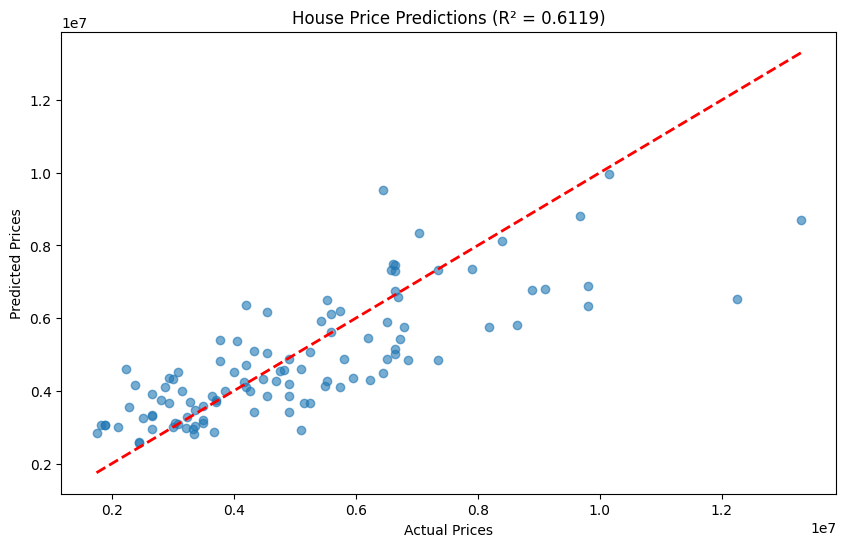

0.611918531405699
1021546.0353211008
1961585044320.3433


In [50]:
# Complete workflow
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and prepare data
#df = pd.read_csv('Housing.csv')
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'House Price Predictions (R² = {r2:.4f})')
plt.show()

print(r2)
print(MAE)
print(MSE)